<a href="https://colab.research.google.com/github/kashafashraf230/CodSoftInternship_CustomerChurnPrediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
churn_modeling_path = ('/content/drive/MyDrive/Churn_Modelling.csv')
churn_data = pd.read_csv(churn_modeling_path)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.shape

(10000, 14)

In [ ]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data = churn_data.drop(['CustomerId', 'Surname'], axis=1)
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#Encoding on Geography and Gender
Geography_dummies=pd.get_dummies(data=data,columns=['Geography'])
Gender_dummies=Geography_dummies.replace(to_replace={'Gender': {'Female':1, 'Male':0}})

In [ ]:
data_encoded = Gender_dummies
data_encoded.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
#Before Handling Imbalanced data
data_encoded['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

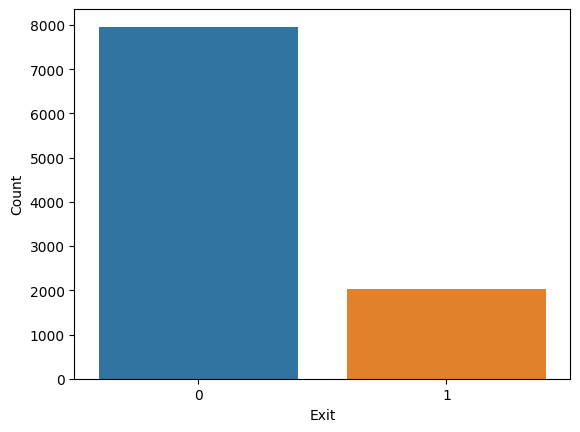

In [ ]:
sns.countplot(x=data_encoded['Exited'], data= data_encoded)
plt.xlabel('Exit')
plt.ylabel('Count')
plt.show()

In [ ]:
#To Split in training and testing
X = data_encoded.drop('Exited', axis=1)
Y = data_encoded['Exited']

In [ ]:
#To handle Imbalanced Data
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, Y_train = SMOTE().fit_resample(X,Y)

In [ ]:
Y_train.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

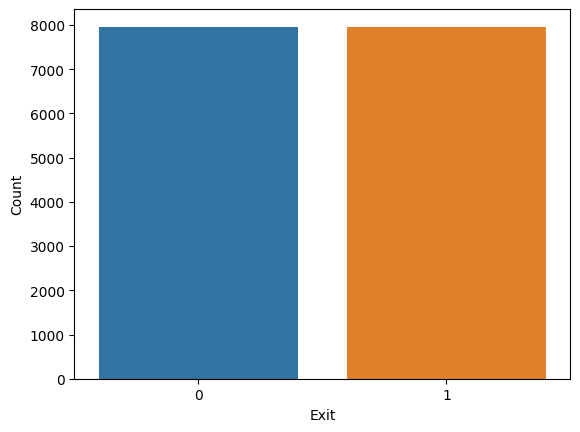

In [ ]:
sns.countplot(x=Y_train, data = Y_train)
plt.xlabel('Exit')
plt.ylabel('Count')
plt.show()

In [ ]:
#Splitting
X_train1,X_test,Y_train1,Y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [ ]:
#Feature Scaling
sc = StandardScaler()

In [ ]:
X_train1 = sc.fit_transform(X_train1)
X_test = sc.transform(X_test)

In [ ]:
X_train1

array([[ 0.75545611, -0.56559294,  1.24398171, ...,  1.2623978 ,
        -0.58194256, -0.45912572],
       [-1.17913252,  1.09845001, -0.80387034, ...,  1.2623978 ,
        -0.58194256, -0.45912572],
       [ 0.42014659, -1.75108759, -0.80387034, ...,  1.2623978 ,
        -0.58194256, -0.45912572],
       ...,
       [-1.46844031,  0.20661   , -0.80387034, ...,  1.2623978 ,
        -0.58194256, -0.45912572],
       [ 0.09130605,  1.47911343,  1.24398171, ..., -0.79214333,
         1.71838266, -0.45912572],
       [ 0.83524038,  0.53289293, -0.80387034, ..., -0.79214333,
         1.71838266, -0.45912572]])

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train1, Y_train1)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(y_pred)

[0 1 0 ... 1 1 1]


In [ ]:
accuracy_score(Y_test, y_pred)

0.8207784055241683

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("Precision Score", precision_score(Y_test, y_pred))
print("Recall Score", recall_score(Y_test, y_pred))
print("f1_Score", f1_score(Y_test, y_pred))

Precision Score 0.8372252747252747
Recall Score 0.784932388924662
f1_Score 0.8102359587902958


In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1633
           1       0.84      0.78      0.81      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



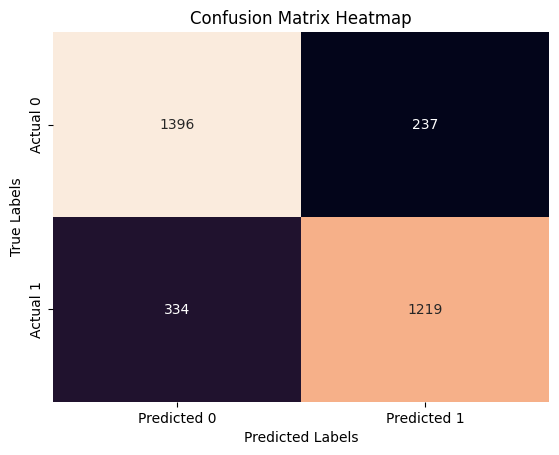

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1' ], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
results=confusion_matrix(Y_test, y_pred)
print(results)

[[1396  237]
 [ 334 1219]]


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train1, Y_train1)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1633
           1       0.89      0.88      0.89      1553

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



In [ ]:
accuracy_score(Y_test, y_pred_rf)

0.889202762084118

In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_train1, Y_train1)

GradientBoostingClassifier()

In [ ]:
y_pred_gb = gb.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1633
           1       0.88      0.86      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [ ]:
final_data=pd.DataFrame({'Models':['LR','RF','GBC'],
                        'Accuracy':[accuracy_score(Y_test,y_pred),
                              accuracy_score(Y_test,y_pred_rf),
                              accuracy_score(Y_test,y_pred_gb)]})

In [ ]:
final_data

,Models,Accuracy
0,LR,0.820778
1,RF,0.889203
2,GBC,0.874137


<Axes: xlabel='Models', ylabel='Accuracy'>

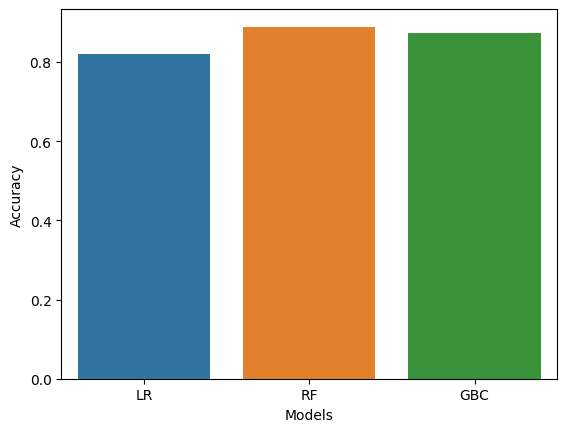

In [ ]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])